<img src = "../Assets/imgs/ML-Codo-g.jpg" alt = "Encabezado MLDS" width = "25%" style="float: left; margin-right:20px" >  </img>

## **MeLi Challenge - Similitud de items**
### **Notebook 02: Extraccion_Embeddings**
**Por: Andrés Felipe Camacho Baquero - [Personal website](https://anfelipecb.github.io/)**


Este código tiene el objetivo de preparar los datos, extraer los `embeddings`, y sus vectores de desempeño, explorar reducción de dimensionalidad, y obtener los resultados finales y de similitud, tanto para `imagenes` como para el texto de los títulos. 

**Outline:**
1. Cargamos datos del notebook anterior
2. Extracción de embeddings de imagenes
3. Extracción de embeddings de texto
4. Combinacion de embeddings 

> **Nota:** Se debe configurar y activar el entorno virtual (README.md) y haber corrido `notebbok 01`

---

#### 1. Cargamos datos del notebook anterior

In [1]:
# Verifiquemos que el entorno en que corre este jupyter es el mismo virutal llamado (melienv)
import os, sys
import pandas as pd

os.getcwd() 
print(sys.executable) #debe datnos el entorno virtual 
sys.path.append('../similarity') # para poder cargar el paquete de python que creamos para el proyecto

/Users/anfelipecb/GitHub/MeLi/MeLi_Challenge_Similarity/melienv/bin/python


In [2]:
import pandas as pd
from similarity.config import data_raw
df_items_all=pd.read_csv(data_raw /'df_items_especificos.csv')
df_items_audifonos=pd.read_csv(data_raw /'df_solo_audifonos.csv')

/var/folders/m8/p0y07mnx0xj8nxd8l9zj7fn00000gn/T/ipykernel_55123/3678112216.py:3: DtypeWarning: Columns (44,46,48,49,51,53,54,56,58,59,61,63,64,66,68,69,71,73,74,75,77,79,80,81,83,85,86,87,89,91,92,93,95,97,98,99,101,103,104,105,107,109,110,111,113,115,116,118,120,121,123,125,126,128,130,131,133,135,136,138,140,141,143,145,146,148,150,151,153,155,156,158,160,161,163,165,166,168,170,171,172,174,176,177,179,181,182,184,186,187,189,191,192,194,196,197,199,201,202,204,206,207,209,211,212,214,216,217,219,221,222,224,226,227,231,232,234,236,237,238,240,242,243,244,246,248,249,250,252,254,255,256,258,260,261,262,264,266,267,269,271,272,274,276,277,278,280,282,283,284,286,288,289,291,293,294,295,297,299,300,302,304,305,307,309,310,311,313,315,316,318,320,321,322,324,326,327,328,330,332,333,334,336,338,339,340,342,344,345,346,348,350,351,353,355,356,358,360,361,363,365,366,368,370,371,373,375,376,378,380,381,383,385,386,388,390,391,393,395,396,398,400,401,403,405,406,407,409,411,412,414,416,417

#### 2. Extracción de `embeddings` de imagenes 

**Embedings:** Los embeddings son representaciiones vectoriales de baja dimensión de entidades (en este caso imágenes) de alta dimensión, de manera compacta.

**Modelo:** En este código implementaremos varios modelos de redes neuronales para obtener los `embeddings`. Empezamos con ResNet50 que es un modelo de microsoft con buen desempeño

--- 
- Acá preprocesamos las imagenes y se pasan a un arreglo en el tamaño óptimo para usar ResNet55 (224x224)
- Descargamos las imagenes con las url del `thumbnail`
- Aplicamos una funcion creada en este proyecto para aplicar un modelo de CNN preentrenado. Devuelve arreglo con IDS se las imagenes y los embeddings

In [3]:
#mostremos las primeras 3 imagenes de dispositivos de audio
from IPython.display import Image

for _, row in df_items_all.iloc[:3].iterrows():
    display(Image(url=row['thumbnail']))

In [4]:
import time

In [5]:
#Vamos a usar la función que pise en 'custom_funcs.py' para preprocesar la imagen y aplicar cualquier modelo 
from similarity.custom_funcs import download_and_preprocess_image_for_model, extract_features_for_model

#Librerias para las funciones personalizadas: RESNET50
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

target_size_resnet50=(224,224)
model=ResNet50(weights='imagenet', include_top=False)
model = Model(inputs=model.input, outputs=model.output)

#Extraemos las características 
ids, features_list_resnet50= extract_features_for_model(df_items_all, model, preprocess_input,target_size_resnet50)


1/1 [==============================] - 0s 48ms/step
Tiempo total para procesar 1047 imágenes con model: 115.62742781639099 segundos


In [44]:
ids

['MLA1533712914',
 'MLA1479723106',
 'MLA1242363814',
 'MLA1418180832',
 'MLA1367709752',
 'MLA1407231661',
 'MLA1485898182',
 'MLA1388780429',
 'MLA1294245045',
 'MLA1533904908',
 'MLA1399773645',
 'MLA1378135041',
 'MLA1439029838',
 'MLA1393452319',
 'MLA1381152873',
 'MLA1378110891',
 'MLA1327392451',
 'MLA1396847643',
 'MLA1251731657',
 'MLA1399899431',
 'MLA909589279',
 'MLA1214572841',
 'MLA1404360979',
 'MLA1301684849',
 'MLA1489866804',
 'MLA1382823469',
 'MLA1137715997',
 'MLA1290998146',
 'MLA1381659257',
 'MLA1511771700',
 'MLA1624353712',
 'MLA1624353794',
 'MLA1322219423',
 'MLA1407733483',
 'MLA1370740989',
 'MLA1548408122',
 'MLA1634946872',
 'MLA1247840144',
 'MLA1389425651',
 'MLA1686586238',
 'MLA1397366071',
 'MLA1447240206',
 'MLA1471281994',
 'MLA1395778529',
 'MLA1499214906',
 'MLA1583206782',
 'MLA1263504081',
 'MLA1390254307',
 'MLA1439956034',
 'MLA1442846434',
 'MLA932466272',
 'MLA1613132122',
 'MLA1538670478',
 'MLA1563268730',
 'MLA877629956',
 'MLA13816657

In [6]:
#Aplicamos dos modelos más para escoger el mejor y tener más opciones para comparar 

# from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input as preprocess_input_inceptionv3
from tensorflow.keras.applications.xception import Xception, preprocess_input as preprocess_input_xception
model_xception = Xception(weights='imagenet', include_top=False)
model_xception = Model(inputs=model_xception.input, outputs=model_xception.output)
target_size_xception = (299, 299)  # Tamaño de entrada para InceptionV3
ids_xception, features_list_xception = extract_features_for_model(df_items_all, model_xception, preprocess_input, target_size_xception)


1/1 [==============================] - 0s 64ms/step
Tiempo total para procesar 1047 imágenes con model_1: 116.54656410217285 segundos


In [7]:
#Una efficient net B0
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input as preprocess_input_efficientnet
# Cargar el modelo EfficientNetB0 preentrenado, excluyendo la capa superior y vamos a intentar con B7 también #
model_efficientnetb0 = EfficientNetB0(include_top=False, weights='imagenet', pooling='avg')
model_efficientnetb0 = Model(inputs=model_efficientnetb0.input, outputs=model_efficientnetb0.output)
target_efficient = (224, 224)  # Tamaño de entrada para Efficient Net

ids_efficientnetb0, features_list_efficientnetb0 = extract_features_for_model(
    df_items_all, 
    model_efficientnetb0, 
    preprocess_input_efficientnet, 
    target_efficient
)

1/1 [==============================] - 0s 27ms/step
Tiempo total para procesar 1047 imágenes con model_2: 71.75510716438293 segundos


In [8]:
#Efficiente net B7
from tensorflow.keras.applications import EfficientNetB7
# Cargar el modelo EfficientNetB7 preentrenado, excluyendo la capa superior
model_efficientnetb7 = EfficientNetB7(include_top=False, weights='imagenet', pooling='avg')

# Tamaños de entrada recomendados para EfficientNetB7
target_efficient7 = (600, 600)

ids_efficientnetb7, features_list_efficientnetb7 = extract_features_for_model(
    df_items_all, 
    model_efficientnetb7, 
    preprocess_input_efficientnet, 
    target_efficient7
)

1/1 [==============================] - 0s 490ms/step
Tiempo total para procesar 1047 imágenes con efficientnetb7: 1391.3570129871368 segundos


#### 3. Visualizando  los embeddings de imagenes
El objeto resultande de los `features_list` es de la forma(n=items, d=dimension de embeddings por item)

Vamos a reducir la dimensionalidad de los `embeddings` para entender las relaciones dentro de los datos
- Primero con PCA (componentes principales) (Creamos una función para visualizar) 
    Atrapa la mayor cantidad posible de la variabilidad original. Obtiene las componentes principales (no correlacionadas) que capturan esa varianza de los datos. Se obtienen a través de combinaciones lineales de las variables originales 
- Luego con t-SNE (t-distributed Stochastic Neighbor Embedding)
    t-SNE se centra en convertir las similitudes entre los datos en probabilidades. Primero, calcula las probabilidades de que un punto en el espacio de alta dimensión sea vecino de otro punto, de manera que puntos más cercanos tienen una probabilidad más alta de ser seleccionados como vecinos. Esto se hace mediante la medición de similitudes como probabilidades condicionales.




In [12]:
import similarity
sys.path.append('../similarity')
import importlib 
importlib.reload(similarity.custom_funcs)

<module 'similarity.custom_funcs' from '/Users/anfelipecb/GitHub/MeLi/MeLi_Challenge_Similarity/Notebooks/../similarity/similarity/custom_funcs.py'>

In [27]:
type(features_list_resnet50)

list

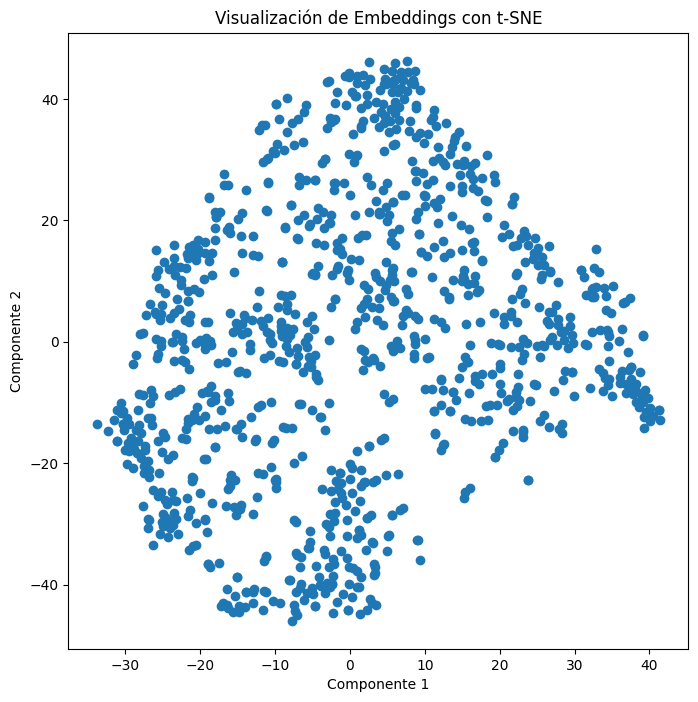

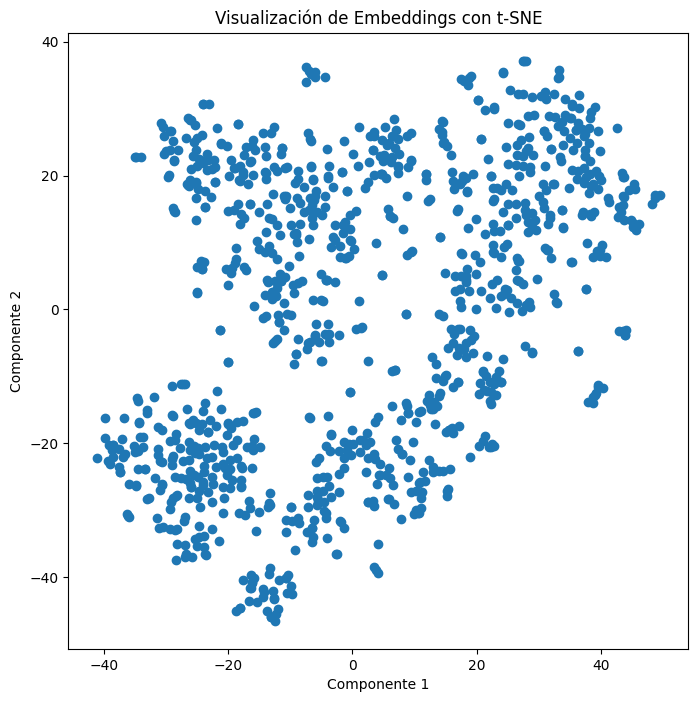

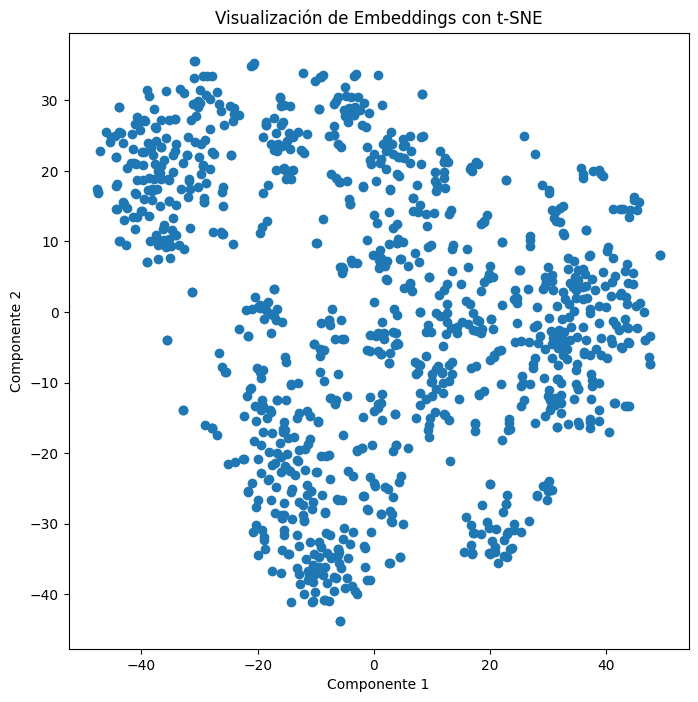

In [39]:
from importlib import reload
import similarity.custom_funcs
reload(similarity.custom_funcs)
from similarity.custom_funcs import visualizar_embeddings

# Para todas las redes los métodos disponibles son: 'PCA' y 't-SNE'
#visualizar_embeddings(features_list_resnet50,out_name='PCA_ResNet50_2D', dims=2, method='PCA')
#visualizar_embeddings(features_list_resnet50,out_name='PCA_ResNet50_3D', dims=3, method='PCA')
#visualizar_embeddings(features_list_resnet50,out_name='tSNE_ResNet50_3D', dims=3, method='t-SNE')
#visualizar_embeddings(features_list_resnet50,out_name='tSNE_ResNet50_2D', dims=2, method='t-SNE')
#visualizar_embeddings(features_list_xception,out_name='PCA_xception_3D', dims=3, method='PCA')

visualizar_embeddings(features_list_xception,out_name='tSNE_xception_2D', dims=2, method='t-SNE')
visualizar_embeddings(features_list_efficientnetb0,out_name='tSNE_efficientb0_2D', dims=2, method='t-SNE')
visualizar_embeddings(features_list_efficientnetb7,out_name='tSNE_efficientb7_2D', dims=2, method='t-SNE')

##### 4. Extracción de `Embeddings` de texto 

Dentro de nuetros datos tenemos el título, que puede aportar a resolver la tarea de hacer similitud. Vamos a utilizr los conceptos de transformer. Y el modelo BERT que nos ayuda a procesar el Lenguaje Natural (NLP)

BERT (Bidirectional Encoder Representation from Transformetrs) 
    Nos ayudará a capturar la similitud contextual entre fragmentos de texto 
    En este caso lo usamos para agrupar los productos con base en descripciones o titulos

NLP: Procesamiento de Lenguaje Natural. 
- Comprensión Contextual: BERT puede entender el contexto de cada palabra en una oración, lo que es crucial para entender el significado completo de los títulos de productos que pueden incluir jerga técnica y números.

- Flexibilidad: Se usa BERT para una amplia gama de tareas de NLP, desde clasificación de texto y extracción de entidades hasta generación de texto y análisis de sentimientos.
- Eficiencia: Tiene muy buen desempeño para tareas de clasificación, dado que no tenemos que generar nuevos textos, nos funciona bien. 

--- 

Empezamos limpiando y normalizando a minusculas 

In [32]:
import re 
def limpiar_texto(text):
    """ Función que nos servirá para limpiar y normalizar el texto.
    """
    text=text.lower() # Lo pasamos a minusculas
    # Eliminamos caracteres especiales pero dejamos los números y espacios
    text = re.sub(r'[^a-z0-9\s]', '', text)
    # Eliminamos espacios adicionales
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Aplicamos la funcion a los titulos 
df_items_all['cleaned_title']=df_items_all['title']. apply(limpiar_texto)

In [33]:
#Cargamos modelo pre-entrenado
import torch
from transformers import BertModel, BertTokenizer

# Cargar el tokenizador y modelo preentrenado de BERT
tokenizer_bert = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Tokenizar y preparar los titulos para BERT:
def encode_titles_bert(data, tokenizer, max_length=512):
    titles=data['cleaned_title'].tolist()
    encoding=tokenizer(titles, padding=True, truncation=True, max_length=max_length, return_tensors="pt")
    return encoding

# Titulos preparados
encoded_inputs=encode_titles_bert(df_items_all, tokenizer_bert)

with torch.no_grad():  # No es necesario calcular gradientes para la extracción de características
    outputs = model(**encoded_inputs)
    # Las características del último estado oculto representan las embeddings de los títulos
    text_embeddings = outputs.last_hidden_state[:, 0, :].numpy()

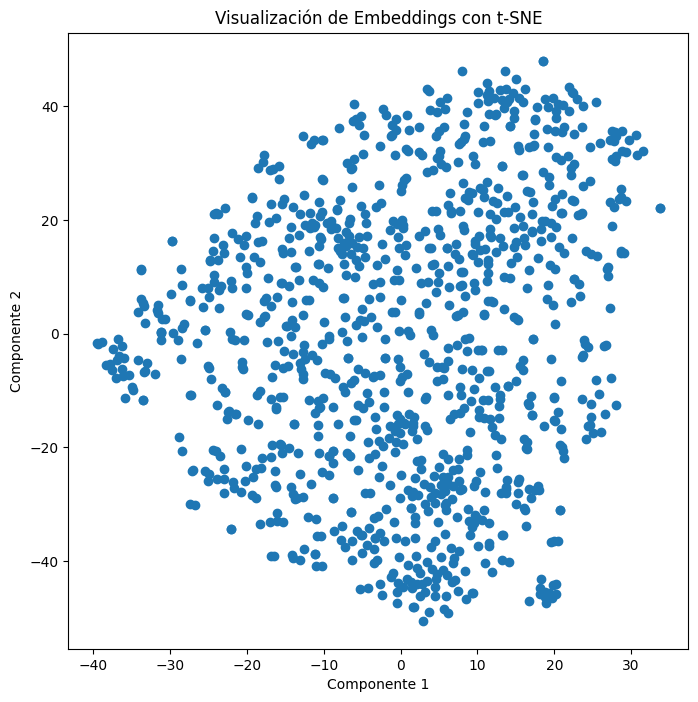

In [34]:
#Visualizamos el embedding de texto 
visualizar_embeddings(text_embeddings,out_name='text_tSNE_BERT_2D', dims=2, method='t-SNE')


#### 5. Combinacion de embeddings de texto y audio 

Con esto creamos un `super-embedding`con nuestros mejores features que obtivimos



In [45]:
import numpy as np 
combined_features_Res50 = np.concatenate([text_embeddings, features_list_resnet50], axis=1)
combined_features_xception = np.concatenate([text_embeddings, features_list_xception], axis=1)
combined_features_efficientb0= np.concatenate([text_embeddings, features_list_efficientnetb0], axis=1)
combined_features_efficientb7=np.concatenate([text_embeddings, features_list_efficientnetb0], axis=1)

#Guardamos los arrays y la base de datos para usarlos luego 
from importlib import reload
import similarity.custom_funcs
reload(similarity.custom_funcs)
from similarity.custom_funcs import Guardar_arrays

Guardar_arrays(combined_features_Res50,'combined_f_Res50')
Guardar_arrays(combined_features_xception,'combined_f_xception')
Guardar_arrays(combined_features_efficientb0,'combined_f_efficientb0')
Guardar_arrays(combined_features_efficientb7,'combined_f_efficientb7')

Guardar_arrays(ids_efficientnetb7, 'ids_efficientnetb7')

In [42]:
#Guardamos data final 
df_items_all.to_csv('../data/final/data_items_all.csv')